## Selecting area of interest

#### Applying canny edge detection before selecting area of interest 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# readd the image
img = cv2.imread('road.png',0)

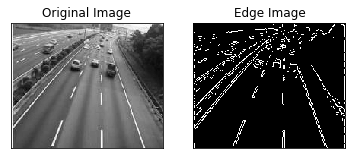

In [3]:
# canny edge detection

edges = cv2.Canny(img,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

#### Applying canny edge detection after selecting area of interest

(166, 201, 3)


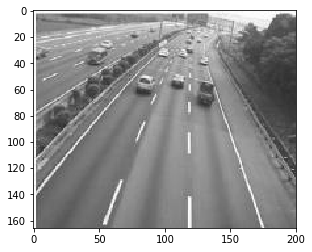

In [4]:
# print the coordinates
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img);
print(img.shape)

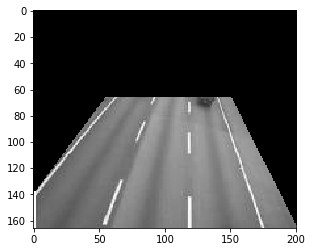

In [5]:
# select the area of interest and mask it

import numpy as np

height = img.shape[0]
width = img.shape[1]

# region of interest
region_of_interest_vertices = [
    
    (0,height),
    (0,140),
    (55,66),
    (150,66),
    (width,height)
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,)* channel_count
    cv2.fillPoly(mask, vertices,match_mask_color)
    masked_image =cv2.bitwise_and(img,mask)
    return masked_image

cropped_image = region_of_interest(img,np.array([region_of_interest_vertices], np.int32,))
plt.imshow(cropped_image);

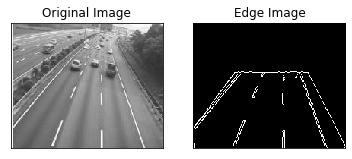

In [6]:
# apply canny edge detection

edges = cv2.Canny(cropped_image,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

 > But in above image region of interest is also detected , meaning the border is also detected this is because we are passing gray scale image for masking then canny edge detection is applied
 <b> This can be tackled as follows: </b>

## step1 : first apply canny edge detection

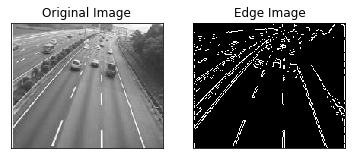

In [7]:
edges = cv2.Canny(img,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

## step 2 : select the area of interest as follows:



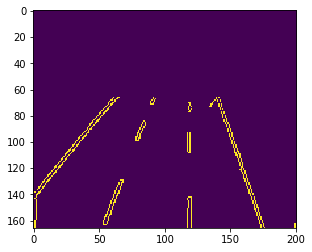

In [8]:
height = img.shape[0]
width = img.shape[1]

# region of interest
region_of_interest_vertices = [
    
    (0,height),
    (0,140),
    (55,66),
    (150,66),
    (width,height)
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    match_mask_color = 255
    cv2.fillPoly(mask, vertices,match_mask_color)
    masked_image =cv2.bitwise_and(img,mask)
    return masked_image

cropped_image = region_of_interest(edges,np.array([region_of_interest_vertices], np.int32,)) # canny image is passesd
plt.imshow(cropped_image);

### Applying Hough transforms

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


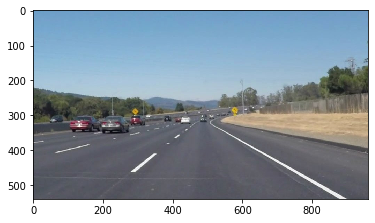

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# reading in an image
image = cv2.imread('Road_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

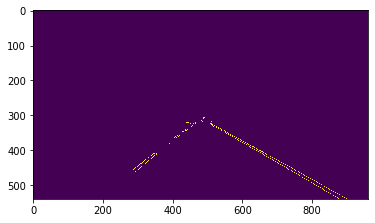

In [4]:
# store the height and width from image
height = image.shape[0]
width = image.shape[1]
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, 300),
    (width, height),
]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()


### After applying canny edge detection and cropped the image , apply hough line transform

In [5]:
# define hough transforms and print detected lines

lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=120,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)

[[[483 311 878 539]]

 [[653 402 727 444]]

 [[803 485 898 539]]

 [[629 389 696 427]]

 [[385 382 491 305]]

 [[486 312 829 510]]

 [[390 382 487 304]]

 [[383 380 464 321]]

 [[720 439 815 493]]

 [[307 451 353 410]]

 [[383 382 485 308]]

 [[581 364 627 388]]

 [[280 462 344 410]]]


In [9]:
# define the utility function

def draw_lines(img, lines, color=[200, 200, 255], thickness=3):
    # If there are no lines to draw, exit.
        if lines is None:
            return
    # Make a copy of the original image.
        img = np.copy(img)
    # Create a blank image that matches the original in size.
        line_img = np.zeros(
            (
                img.shape[0],
                img.shape[1],
                3
            ),
            dtype=np.uint8,
        )
    # Loop over all lines and draw them on the blank image.
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
        # Merge the image with the lines onto the original.
        img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
        # Return the modified image.
        return img

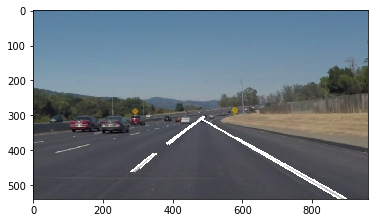

In [10]:
# render the detected lines on the original image

line_image = draw_lines(image, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()